# Financial Statement Fraud Detection
#### Ryan Huang

## Setup


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
finfraud = pd.read_csv("/Users/ryanhuang/Developer/GraLNA/data_FraudDetection_JAR2020.csv")

In [3]:
finfraud.head()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,NaN,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,NaN,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,NaN,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,NaN,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,NaN,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [4]:
finfraud.columns.values

array(['fyear', 'gvkey', 'p_aaer', 'misstate', 'act', 'ap', 'at', 'ceq',
       'che', 'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt',
       'ivao', 'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect',
       'sale', 'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'dch_wc',
       'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm',
       'ch_roa', 'issue', 'bm', 'dpi', 'reoa', 'EBIT', 'ch_fcf'],
      dtype=object)

In [5]:
finfraud.shape

(146045, 46)

We can learn even more about our `DataFrame`. The `info()` method gives a few useful pieces of information, including the shape of the `DataFrame`, the variable type of each column, and the amount of memory stored.

The output from `info()` displayed below shows that the fields ‘year’ and ‘pop’ (population) are represented as ‘float’ (that is: numbers with a decimal point). This is not appropriate: year and population should be integers or whole numbers. We can change the data-type with the function `astype()`. The code for `astype()` is shown below; however, we will change the data types later in this lesson.

In [6]:
finfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

The `describe()` method will take the numeric columns and provide a summary of their values. This is useful for getting a sense of the ranges of values and seeing if there are any unusual or suspicious numbers.


In [7]:
finfraud.describe()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,964.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,2002.011702,54243.435516,2503.840249,0.006601,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,6.959894,59937.455765,912.093250,0.080976,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,1990.000000,1004.000000,371.000000,0.000000,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,1996.000000,10658.000000,1803.000000,0.000000,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,2002.000000,25088.000000,2620.500000,0.000000,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,2008.000000,66586.000000,3180.000000,0.000000,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,2014.000000,317264.000000,3996.000000,1.000000,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


The `DataFrame` function `describe()` just blindly looks at all numeric variables. We wouldn't actually want to take the mean year. Additionally, we obtain ‘NaN’ values for our quartiles. This suggests we might have missing data which we can (and will) deal with shortly when we begin to clean our data.

For now, let's pull out only the columns that are truly continuous numbers (i.e. ignore the description for ‘year’). This is a preview of selecting columns from the data; we'll talk more about how to do it later in the lesson.

In [8]:
# List of columns to exclude
keys = ['fyear', 'gvkey', 'p_aaer', 'misstate']

# Create a list of all columns
all_columns = finfraud.columns.tolist()

# Remove the unwanted columns from the list
relevant_cols = [col for col in all_columns if col not in keys]

finfraud[relevant_cols].describe()


,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,97.004595,127.228109,201.312344,538.377614,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,540.874888,1023.091819,1628.477359,2660.670828,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,0.000000,-0.069000,-19.687000,0.000000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,8.796000,0.008000,0.000000,0.000000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,22.540000,1.363000,0.063000,4.474000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,60.736000,12.750000,24.873000,126.212000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,100092.395000,75553.000000,188791.978000,120274.000000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


We can also extract one specific variable metric at a time if we wish:

In [9]:
print (finfraud['act'].min())
print (finfraud['act'].max())
print (finfraud['act'].mean())
print (finfraud['act'].std())
print (finfraud['act'].count())

-0.254
152629.0
737.8477586634256
3744.542367791546
146045


#### Values in columns

Next, let's say you want to see all the unique values for the `region` column. One way to do this is:

In [10]:
pd.unique(finfraud.p_aaer)

array([  nan,  789.,  683.,  823.,  573., 1126.,  395.,  389.,  669.,
        508.,  702.,  555.,  751.,  591.,  473.,  543.,  843.,  612.,
        762., 1140.,  715.,  778.,  696., 1602.,  906.,  838.,  874.,
        915.,  621.,  371.,  951.,  857.,  960., 1106.,  623.,  965.,
       2068.,  684., 1037.,  999., 2313.,  903.,  812.,  926.,  901.,
       1033.,  598.,  782., 1071.,  776.,  987.,  967.,  956., 1378.,
       1184.,  839., 1123., 1067., 1233., 1237.,  787., 1053., 1044.,
       1301.,  975.,  834.,  959., 1240., 1331., 1176., 1110., 2754.,
       1047.,  837., 1285.,  786., 3073., 1128., 1104.,  846.,  992.,
       1311., 1181., 1518., 1533., 1328., 1470., 1169., 1308., 1343.,
       1258., 1397., 3182., 1393., 2555., 1154., 1422., 1511., 1190.,
       1563., 1536., 1568., 3217.,  990., 1534., 1259., 1454., 1629.,
       1456., 1531., 1648., 1718., 1480., 2232., 2370., 2551., 2819.,
       1329., 2449., 1542., 2620., 1575., 1766., 1295., 2953., 3045.,
       1967., 2661.,

This output is useful, but it looks like there may be some formatting issues causing the same region to be counted more than once. Let's take it a step further and find out to be sure. 

As mentioned previously, the command `value_counts()` gives you a first global idea of your categorical data such as strings. In this case that is the column `region`. Run the code below.

In [11]:
# How many unique regions are in the data?
print(len(finfraud['p_aaer'].unique()))

# How many times does each unique region occur?
finfraud['p_aaer'].value_counts()

413


3073.0    13
3855.0    12
3182.0    11
2754.0    11
2953.0     9
          ..
1559.0     1
2105.0     1
1669.0     1
2218.0     1
3949.0     1
Name: p_aaer, Length: 412, dtype: int64

The table reveals some problems in our data set. The data set covers 12 years, so each ‘region’ should appear 12 times, but some regions appear more than 12 times and others fewer than 12 times. We also see inconsistencies in the region names (string variables are very susceptible to those), for instance:

Asia_china	vs. Asia_China

Another type of problem we see is the various names of 'Congo'. In order to analyze this dataset appropriately we need to take care of these issues. We will fix them in the next section on data cleaning.

#### Exercises
Are there other columns in our `DataFrame` that have categorical variables? If so, run some code to list the categories below. Save your list to a variable and count the number of unique categories using `len`.

What is the outcome when you run `value_counts()`?

## Data cleaning

## Handling Missing Data

Missing data (often denoted as 'NaN'- not a number- in Pandas, or as 'null') is an important issue to handle because Pandas cannot compute on rows or columns with missing data. 'NaN' or 'null' does not mean the value at that position is zero, it means that there is no information at that position. Ignoring missing data doesn't make it go away. There are different ways of dealing with it which include:

* analyzing only the available data (i.e. ignore the missing data)
* input the missing data with replacement values and treating these as though they were observed
* input the missing data and account for the fact that these were inputed with uncertainty (ex: create a new boolean variable so you know that these values were not actually observed)
* use statistical models to allow for missing data--make assumptions about their relationships with the available data as necessary

For our purposes with the dirty gapminder data set, we know our missing data is excess (and unnecessary) and we are going to choose to analyze only the available data. To do this, we will simply remove rows with missing values.

This is incredibly easy to do because Pandas allows you to either remove all instances with null data or replace them with a particular value.

`df = df.dropna()` drops rows with any column having NA/null data.  `df = df.fillna(value)` replaces all NA/null data with the argument `value`.

For more fine-grained control of which rows (or columns) to drop, you can use `how` or `thresh`. These are more advanced topics and are not covered in this lesson; you are encouraged to explore them on your own.

In [12]:
#fill empty with median of that column
finfraud_copy = finfraud.fillna(finfraud.median())
finfraud_copy.head()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,2620.5,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,2620.5,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,2620.5,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,2620.5,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,2620.5,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


## Changing Data Types
We can change the data-type with the function `astype()`. The code for `astype()` is shown below.

In [13]:
finfraud_copy['fyear'] = finfraud_copy['fyear'].astype(int)
finfraud_copy['gvkey'] = finfraud_copy['gvkey'].astype(int)
finfraud_copy['p_aaer'] = finfraud_copy['p_aaer'].astype(int)
finfraud_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       146045 non-null  int64  
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

## Handling (Unwanted) Repetitive Data
You can identify which observations are duplicates.
The call `df.duplicated()` will return boolean values for each row in the `DataFrame` telling you whether or not a row is repeated.

In cases where you don’t want repeated values (we wouldn’t--we only want each country to be represented once for every relevant year), you can easily drop such duplicate rows with the call `df.drop_duplicates()`.

In [14]:
finfraud_copy.duplicated().head() #shows we have a repetition within the first 5 rows

0    False
1    False
2    False
3    False
4    False
dtype: bool

Let's look at the first five rows of our data set again (remember we removed the NaNs):

In [15]:
finfraud_copy.head()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,2620,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,2620,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,2620,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,2620,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,2620,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


### Removing and renaming columns

We also want to remove the space from the `life exp` column name. We can do that with Pandas `rename` method. It takes a dictionary as its argument, with the old column names as keys and new column names as values.

If you're unfamiliar with dictionaries, they are a very useful data structure in Python.  You can read more about them [here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [16]:
finfraud_copy = finfraud_copy.rename(columns={'act' : 'current_assets_total',
                                              'at' : 'total_assets',
                                              'ap' : 'accounts_payable',
                                            'ceq' : 'common_equity',
                                            'che' : 'cash',
                                            'cogs' : 'cost_of_goods_sold',
                                            'csho' : 'common_shares_outstanding',
                                            'dlc' : 'current_debt',
                                            'dltt' : 'long_term_debt',
                                            'dp' : 'depreciation',
                                            'ib' : 'income_before_extraordinary_items',
                                            'invt' : 'inventories',
                                            'ivao' : 'investments_advances_other',
                                            'ivst' : 'short_term_investments',
                                            'lct' : 'current_liabilities',
                                            'lt' : 'total_liabilities',
                                            'ni' : 'net_income',
                                            'ppegt' : 'gross_property_plant_equipment',
                                            'pstk' : 'preferred_stock',
                                            're' : 'retained_earnings',
                                            'rect' : 'receivables',
                                            'sale' : 'sales',
                                            'seq' : 'stockholders_equity',
                                            'txt' : 'income_tax',
                                            'xint' : 'interest_expense'})

finfraud_copy.columns.values
#finfraud_copy.head()

array(['fyear', 'gvkey', 'p_aaer', 'misstate', 'current_assets_total',
       'accounts_payable', 'total_assets', 'common_equity', 'cash',
       'cost_of_goods_sold', 'common_shares_outstanding', 'current_debt',
       'dltis', 'long_term_debt', 'depreciation',
       'income_before_extraordinary_items', 'inventories',
       'investments_advances_other', 'short_term_investments',
       'current_liabilities', 'total_liabilities', 'net_income',
       'gross_property_plant_equipment', 'preferred_stock',
       'retained_earnings', 'receivables', 'sales', 'sstk', 'txp',
       'income_tax', 'interest_expense', 'prcc_f', 'dch_wc', 'ch_rsst',
       'dch_rec', 'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa',
       'issue', 'bm', 'dpi', 'reoa', 'EBIT', 'ch_fcf'], dtype=object)

#### Sorting
Sorting may help to further organize and inspect your data. The command `sort_values()` takes a number of arguments; the most important ones are `by` and `ascending.` The following command will sort your `DataFrame` by year, beginning with the most recent.

In [17]:
finfraud_copy.sort_values(by='fyear', ascending = True)

,fyear,gvkey,p_aaer,misstate,current_assets_total,accounts_payable,total_assets,common_equity,cash,cost_of_goods_sold,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,2620,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
3045,1990,12657,2620,0,21.764,7.308,26.032,6.052,0.046,35.325,...,0.841964,0.105255,-0.250525,0.008243,1,0.863431,0.868617,0.049132,0.079556,-0.027282
3046,1990,12658,2620,0,17.212,10.662,19.021,1.131,0.833,101.761,...,0.881710,0.252879,0.202005,0.014307,1,0.052684,0.898447,-0.166080,0.271805,-0.130685
3047,1990,12659,2620,0,103.578,23.967,115.217,42.172,10.946,186.994,...,0.832238,0.150974,0.123219,0.105367,1,0.676974,1.017065,0.247811,0.104542,0.085382
3048,1990,12661,2620,0,10.137,3.861,44.071,7.725,2.445,111.669,...,0.250210,0.162140,0.506092,0.016142,1,0.662294,0.817797,0.089515,0.074221,0.030613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142289,2014,23667,2620,0,5382.525,3212.815,17108.394,5861.724,1965.202,28085.211,...,0.410525,-0.121373,-0.028198,-0.133705,0,0.399119,1.006043,-0.142099,0.074692,0.084438
142288,2014,23623,2620,0,1.211,0.210,1.498,-1.529,0.524,0.804,...,0.620160,0.508782,0.573692,1.621628,1,-0.263650,1.157848,-30.336449,-1.324433,0.708687
142287,2014,23561,2620,0,0.037,5.960,9.665,-3.063,0.014,0.000,...,0.004515,0.067918,-0.023205,-0.040838,0,-0.217883,0.974302,-11.412933,-0.018934,-0.104887
142295,2014,23790,2620,0,8.492,0.993,10.210,-10.727,3.586,5.426,...,0.555338,0.077364,-0.009202,0.048768,1,-0.397551,1.377627,-3.288443,0.179040,0.123440


### Exercise

Organize your data set by country, from ‘Afganistan’ to ‘Zimbabwe’.

## Summarize and plot

Summaries (but can’t *say* statistics…)
* Sort data
* Can make note about using numpy functions, dif between `DataFrame` and `array`
Good Plots for the data/variable type



Plots 
* of subsets, 
* single variables
* pairs of variables
* Matplotlib syntax (w/ Seaborn for defaults (prettier, package also good for more analysis later...))

Exploring is often iterative - summarize, plot, summarize, plot, etc. - sometimes it branches…


## Summarizing data



In [18]:
finfraud_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   fyear                              146045 non-null  int64  
 1   gvkey                              146045 non-null  int64  
 2   p_aaer                             146045 non-null  int64  
 3   misstate                           146045 non-null  int64  
 4   current_assets_total               146045 non-null  float64
 5   accounts_payable                   146045 non-null  float64
 6   total_assets                       146045 non-null  float64
 7   common_equity                      146045 non-null  float64
 8   cash                               146045 non-null  float64
 9   cost_of_goods_sold                 146045 non-null  float64
 10  common_shares_outstanding          146045 non-null  float64
 11  current_debt                       1460

We also saw above that the `describe()` method will take the numeric columns and give a summary of their values. We have to remember that we changed the column names and this time it shouldn't have NaNs.

### More summaries

What if we just want a single value, like the mean of the population? We can call mean on a single column this way:


In [19]:
finfraud_copy['fyear'].median()

2002.0

In [20]:
finfraud_misstate = finfraud_copy[finfraud_copy['misstate'] == 1]
finfraud_per_year = finfraud_misstate[['fyear', 'misstate']].groupby(by='fyear').count()
finfraud_per_year = finfraud_per_year.reset_index()

# now want to see most common repeaters
finfraud_repeater = finfraud_misstate[['gvkey', 'misstate']].groupby(by='gvkey').count()
finfraud_repeater = finfraud_repeater.reset_index()
finfraud_repeater = finfraud_repeater.sort_values(by='misstate', ascending = False)
finfraud_repeater = finfraud_repeater[finfraud_repeater['misstate'] >= 6]

# want to eliminate serial fraud issue so keep only the first year of fraud for a gvkey if the years are in succession
finfraud_per_year_unique = finfraud_misstate.sort_values(by=['gvkey', 'fyear'], ascending = True)
finfraud_per_year_unique = finfraud_per_year_unique.drop_duplicates(subset='gvkey', keep='first')
finfraud_per_year_unique = finfraud_per_year_unique[['fyear', 'misstate']].groupby(by='fyear').count()
finfraud_per_year_unique = finfraud_per_year_unique.reset_index()

# adding company names to gvkey so bar chart is easier to read
file1 = '/Users/ryanhuang/Developer/GraLNA/New/gvkeys.xls'
comp_data = pd.read_excel(file1)
comp_data = comp_data[['GVKEY', 'CONAME']]
comp_data = comp_data.rename(columns={'GVKEY' : 'gvkey'})

finfraud_repeater = finfraud_repeater.merge(comp_data, on='gvkey', how='left')
finfraud_repeater = finfraud_repeater.sort_values(by='misstate', ascending = False)
#keep coname and misstate columns in that order and rename coname to Company Name
finfraud_repeater = finfraud_repeater[['CONAME', 'misstate']]
finfraud_repeater = finfraud_repeater.rename(columns={'CONAME' : 'Company Name'})
finfraud_repeater



,Company Name,misstate
0,BLACK BOX CORP,13
2,OVERSEAS SHIPHOLDING GROUP,12
1,AFFILIATED COMPUTER SERVICES,12
3,UNITEDHEALTH GROUP INC,11
4,INTEGRATED SILICON SOLUTION,9
5,MERCURY INTERACTIVE CORP,9
6,MONSTER WORLDWIDE INC,8
7,BROADCOM CORP -CL A,8
8,VITESSE SEMICONDUCTOR CORP,8
11,COMVERSE TECHNOLOGY INC,7


What if we wanted a new `DataFrame` that just contained these summaries? This could be a table in a report, for example.

<Axes: title={'center': 'New Unique Fraud Cases per Year'}, xlabel='fyear'>

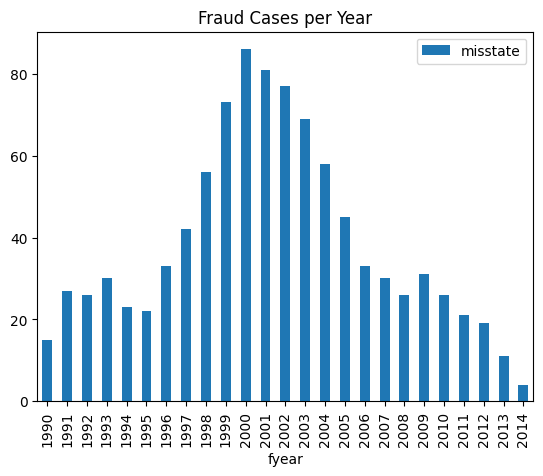

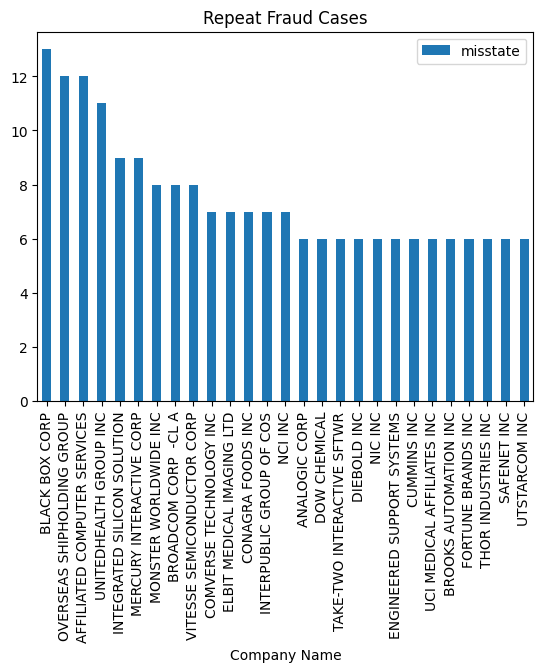

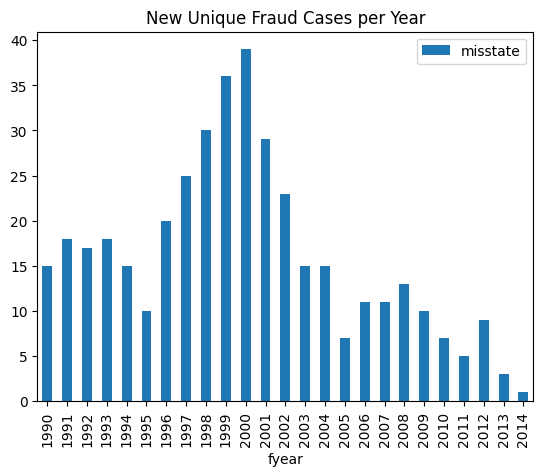

In [21]:

finfraud_per_year.plot(x='fyear', y='misstate', kind='bar', title='Fraud Cases per Year')
finfraud_repeater.plot(x='Company Name', y='misstate', kind='bar', title='Repeat Fraud Cases')
finfraud_per_year_unique.plot(x='fyear', y='misstate', kind='bar', title='New Unique Fraud Cases per Year')

#finfraud_per_year_unique.plot(x='fyear', y='misstate', kind='bar', title='Unique Fraud Cases per Year')


## Visualization with `matplotlib`

Recall that [matplotlib](http://matplotlib.org) is Python's main visualization 
library. It provides a range of tools for constructing plots and numerous 
high-level plotting libraries (e.g., [Seaborn](http://seaborn.pydata.org)) are 
built with matplotlib in mind. When we were in the early stages of setting up 
our analysis, we loaded these libraries like so:

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

*Consider the above three commands to be essential practice for plotting (as
essential as **`import`** `pandas` **`as`** `pd` is for data munging).*

Now, let's turn to data visualization. In order to get a feel for the properties
of the data set we are working with, data visualization is key. While, we will
focus only on the essentials of how to properly construct plots in univariate
and bivariate settings here, it's worth noting that both matplotlib and Seaborn
support a diversity of plots: [matplotlib 
gallery](http://matplotlib.org/gallery.html), [Seaborn
gallery](http://seaborn.pydata.org/examples/). 


---

### Single variables

* __Histograms__ - provide a quick way of visualizing the distribution of numerical
  data, or the frequencies of observations for categorical variables.

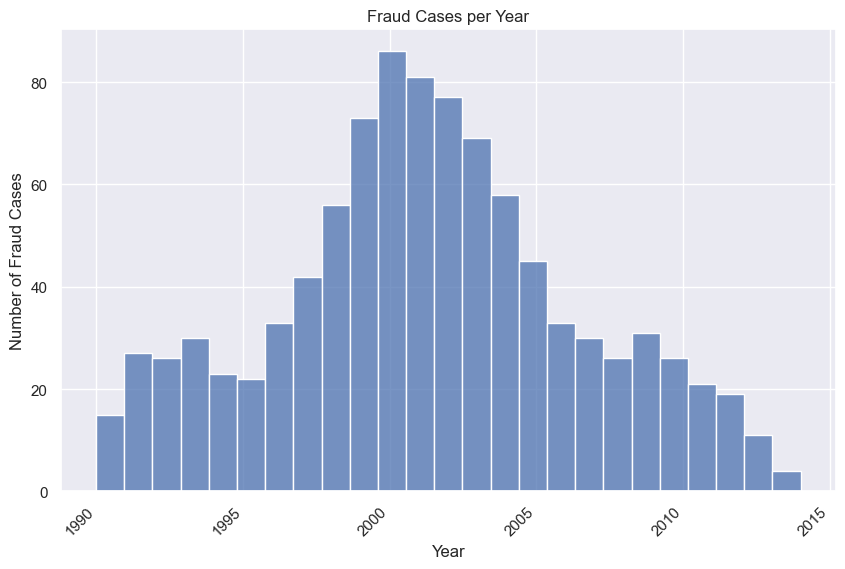

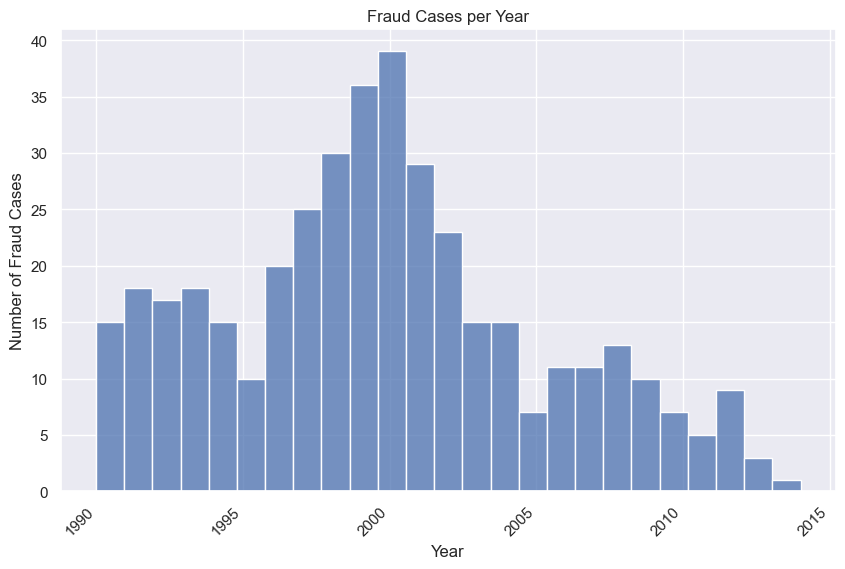

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=finfraud_per_year, x='fyear', weights='misstate', bins=len(finfraud_per_year['fyear'].unique()), kde=False)
plt.title('Fraud Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=finfraud_per_year_unique, x='fyear', weights='misstate', bins=len(finfraud_per_year['fyear'].unique()), kde=False)
plt.title('Fraud Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45, ha='right')
plt.show()


# Logistic Regression

In [77]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Calculate the class weight ratio
    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

    # Create a logistic regression model with class weights
    model = LogisticRegression(random_state=42, class_weight={0: 1, 1: class_weight_ratio})

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

  # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    # The AUC is a measure of how well the model can distinguish between classes.
    # An AUC of 1.0 is ideal, while an AUC of 0.5 indicates that the model is no better than random.
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/Logit_results.csv', index=False)


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for year 2003: 0.7183792237845894
Sensitivity for year 2003: 0.043478260869565216
NDCG@59 for year 2003: 0.04076681103706372
Precision for year 2003: 0.05084745762711865
Best threshold for year 2003: 0.961
Accuracy for year 2003: 0.9730814245109514
Precision for year 2003: 0.0660377358490566
Recall for year 2003: 0.10144927536231885
True Positives for year 2003: 7
False Positives for year 2003: 99
False Negatives for year 2003: 62
AUC for year 2003: 0.7183792237845894


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2004: 0.7165559493908594
Sensitivity for year 2004: 0.05172413793103448
NDCG@59 for year 2004: 0.043676804586868026
Precision for year 2004: 0.05084745762711865
Best threshold for year 2004: 0.998
Accuracy for year 2004: 0.9865183687226154
Precision for year 2004: 0.07692307692307693
Recall for year 2004: 0.034482758620689655
True Positives for year 2004: 2
False Positives for year 2004: 24
False Negatives for year 2004: 56
AUC for year 2004: 0.7165559493908594


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2005: 0.6707192238646346
Sensitivity for year 2005: 0.022222222222222223
NDCG@58 for year 2005: 0.014568060379130698
Precision for year 2005: 0.017241379310344827
Best threshold for year 2005: 0.995
Accuracy for year 2005: 0.9880607197680369
Precision for year 2005: 0.037037037037037035
Recall for year 2005: 0.022222222222222223
True Positives for year 2005: 1
False Positives for year 2005: 26
False Negatives for year 2005: 44
AUC for year 2005: 0.6707192238646346


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2006: 0.7192469374597035
Sensitivity for year 2006: 0.030303030303030304
NDCG@59 for year 2006: 0.012918815218322341
Precision for year 2006: 0.01694915254237288
Best threshold for year 2006: 0.9460000000000001
Accuracy for year 2006: 0.9773188896411645
Precision for year 2006: 0.028037383177570093
Recall for year 2006: 0.09090909090909091
True Positives for year 2006: 3
False Positives for year 2006: 104
False Negatives for year 2006: 30
AUC for year 2006: 0.7192469374597035


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2007: 0.69137261619276
Sensitivity for year 2007: 0.0
NDCG@58 for year 2007: 0.0
Precision for year 2007: 0.0
Best threshold for year 2007: 0.8280000000000001
Accuracy for year 2007: 0.9107021131561008
Precision for year 2007: 0.01568627450980392
Recall for year 2007: 0.26666666666666666
True Positives for year 2007: 8
False Positives for year 2007: 502
False Negatives for year 2007: 22
AUC for year 2007: 0.69137261619276


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2008: 0.7029386653446804
Sensitivity for year 2008: 0.038461538461538464
NDCG@56 for year 2008: 0.02263325536455787
Precision for year 2008: 0.017857142857142856
Best threshold for year 2008: 0.999
Accuracy for year 2008: 0.9932287954383464
Precision for year 2008: 0.07142857142857142
Recall for year 2008: 0.038461538461538464
True Positives for year 2008: 1
False Positives for year 2008: 13
False Negatives for year 2008: 25
AUC for year 2008: 0.7029386653446804
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.718379  0.973081   0.066038  0.101449             7.0   
1  2004.0  0.716556  0.986518   0.076923  0.034483             2.0   
2  2005.0  0.670719  0.988061   0.037037  0.022222             1.0   
3  2006.0  0.719247  0.977319   0.028037  0.090909             3.0   
4  2007.0  0.691373  0.910702   0.015686  0.266667             8.0   
5  2008.0  0.702939  0.993229   0.071429  0.038462             1.0   

   false_positives  false_neg

/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)


### Data Summary

In [78]:
#define results dataframe with method, average auc, ndcg, precision, and sensitivity
ML_results = pd.DataFrame(columns=['method', 'auc', 'NDCG_at_k', 'precision_JAR', 'sensitivity'])

# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results['auc'].mean()))
print("Average NDCG: {}".format(results['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results['sensitivity'].mean()))

# Add the average results to the DataFrame
ML_results = ML_results.append({'method': 'Logit', 'auc': results['auc'].mean(), 'NDCG_at_k': results['NDCG_at_k'].mean(), 'precision_JAR': results['precision_JAR'].mean(), 'sensitivity': results['sensitivity'].mean()}, ignore_index=True)

# precision and sensitivity converted to percentage with symbol and rename precision_jar to precision, keep three decimal places for others
ML_results['auc'] = ML_results['auc'].map("{:.3}".format)
ML_results['NDCG_at_k'] = ML_results['NDCG_at_k'].map("{:.3}".format)
ML_results['precision'] = ML_results['precision_JAR'].map("{:.3%}".format)
ML_results['sensitivity'] = ML_results['sensitivity'].map("{:.3%}".format)
ML_results = ML_results.drop(columns='precision_JAR')

print(ML_results)



Average AUC: 0.7032021026728712
Average NDCG: 0.022427291097657107
Average Precision: 0.02562376499401631
Average Sensitivity: 0.03103153163123178
  method    auc NDCG_at_k sensitivity precision
0  Logit  0.703    0.0224      3.103%    2.562%


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/1684906072.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({'method': 'Logit', 'auc': results['auc'].mean(), 'NDCG_at_k': results['NDCG_at_k'].mean(), 'precision_JAR': results['precision_JAR'].mean(), 'sensitivity': results['sensitivity'].mean()}, ignore_index=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


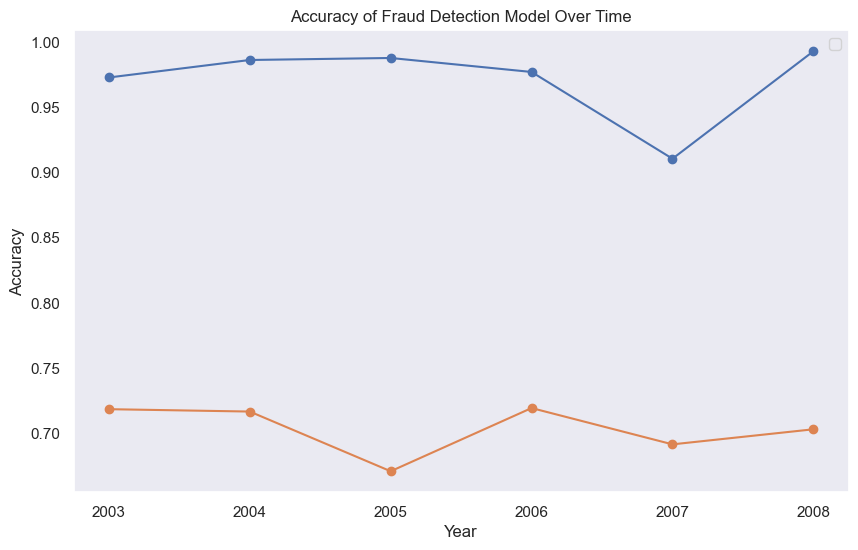

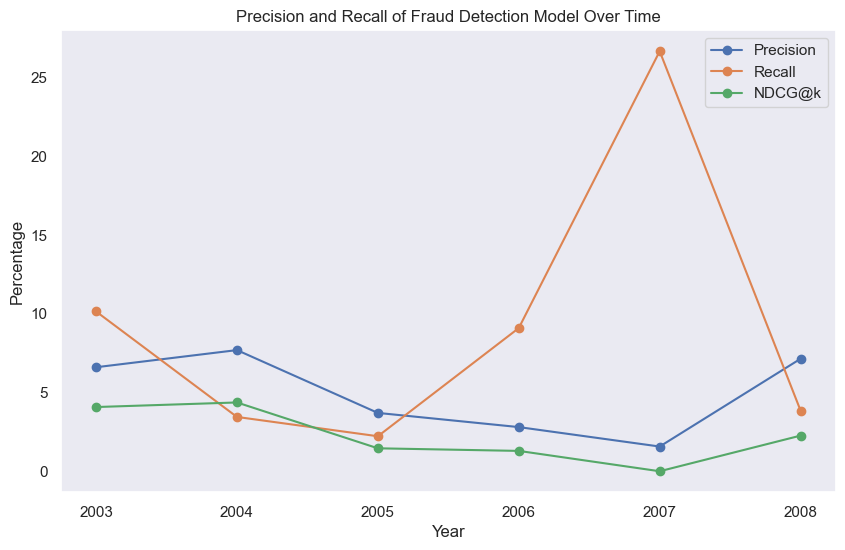

In [79]:
# Plot results for accuracy
plt.figure(figsize=(10, 6))
plt.plot(results['year'], results['accuracy'], marker='o')
plt.plot(results['year'], results['auc'], marker='o')
plt.title('Accuracy of Fraud Detection Model Over Time')
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot results for precision and recall on the same graph but convert to percentage
plt.figure(figsize=(10, 6))
plt.plot(results['year'], results['precision'] * 100, marker='o', label='Precision')
plt.plot(results['year'], results['recall'] * 100, marker='o', label='Recall')
plt.plot(results['year'], results['NDCG_at_k'] * 100, marker='o', label='NDCG@k')
plt.title('Precision and Recall of Fraud Detection Model Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid()




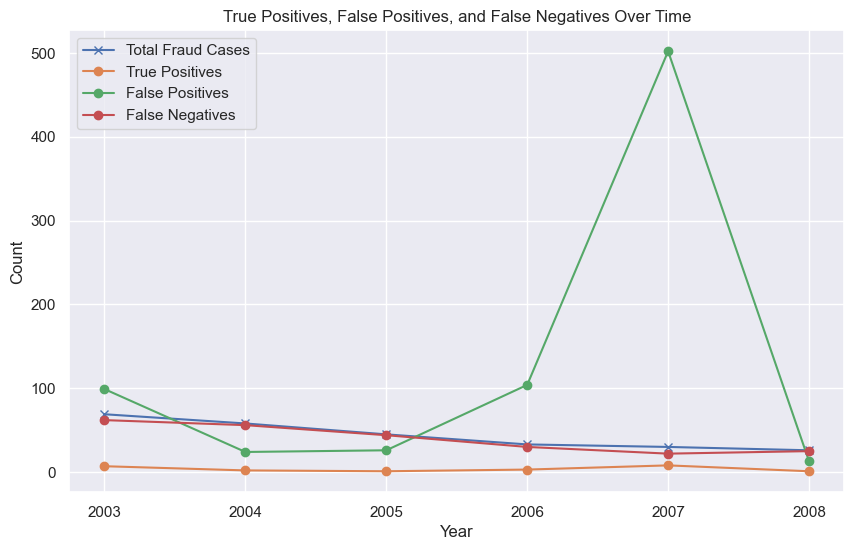

In [80]:
# Plot true positives, false positives, and false negatives compared to the overall number of fraud cases that year
plt.figure(figsize=(10, 6))
# selecting relevant years from finfraud_per_year
finfraud_per_year_plot = finfraud_per_year[(finfraud_per_year['fyear'] >= 2003) & (finfraud_per_year['fyear'] <= 2008)]
plt.plot(finfraud_per_year_plot['fyear'], finfraud_per_year_plot['misstate'], label='Total Fraud Cases', marker='x')
plt.plot(results['year'], results['true_positives'], label='True Positives', marker='o')
plt.plot(results['year'], results['false_positives'], label='False Positives', marker='o')
plt.plot(results['year'], results['false_negatives'], label='False Negatives', marker='o')
plt.title('True Positives, False Positives, and False Negatives Over Time')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


# SVM-FK

In [28]:
#export finfraud_copy to csv
finfraud_copy.to_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv', index=False)


In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Define the financial kernel
def financial_kernel(X1, X2):
    n_features = X1.shape[1] // 2  # Assuming each feature has two years of data
    kernel = np.zeros((X1.shape[0], X2.shape[0]))

    for i in range(n_features):
        for j in range(i + 1, n_features):
            A1 = X1[:, i]
            A2 = X1[:, i + n_features]
            L1 = X1[:, j]
            L2 = X1[:, j + n_features]

            B1 = X2[:, i]
            B2 = X2[:, i + n_features]
            K1 = X2[:, j]
            K2 = X2[:, j + n_features]

            kernel += (A1 / L1)[:, None] * (B1 / K1)[None, :]
            kernel += (L1 / A1)[:, None] * (K1 / B1)[None, :]
            kernel += (L2 / A2)[:, None] * (K2 / B2)[None, :]
            kernel += (A2 / L2)[:, None] * (B2 / K2)[None, :]
            kernel += (A1 * L2 / (A2 * L1))[:, None] * (B1 * K2 / (B2 * K1))[None, :]
            kernel += (L1 * A2 / (L2 * A1))[:, None] * (K1 * B2 / (K2 * B1))[None, :]
    
    return kernel

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train2 = X1_normalized_df[X1['fyear'] <= year - 2].values
    X_test = X1_normalized_df[X1['fyear'] == year].values
    y_train2 = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # print number of misstate = 1 and 0 in X_train2
    print(y_train2.value_counts())

    # pick same number of fraud and non-fraud cases for training and validation not using random 
    rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
    X_train, y_train = rus.fit_resample(X_train2, y_train2)

    


    # display x train and y train shape
    print(X_train.shape, y_train.shape)

    # Create an SVM model with a financial kernel
    model = SVC(kernel=financial_kernel, probability=True, random_state=10)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

# Save the results to a CSV file
results.to_csv('SVM_FK_results.csv', index=False)


0    71234
1      514
Name: misstate, dtype: int64


NameError: name 'X_train' is not defined

# Random Forest

In [ ]:
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Create a Random Forest model
    model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=3000)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC)
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k': NDCG_at_k, 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)


KeyboardInterrupt: 

### Data Summary

In [88]:
# read in results from server
results2 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RF_results.csv')


In [92]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results2['auc'].mean()))
print("Average NDCG: {}".format(results2['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results2['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results2['sensitivity'].mean()))

# Compute the mean values
mean_auc = results2['auc'].mean()
mean_NDCG_at_k = results2['NDCG_at_k'].mean()
mean_precision = results2['precision_JAR'].mean() * 100
mean_sensitivity = results2['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML_results = ML_results.append({
    'method': 'Random Forest',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)

print(ML_results)


Average AUC: 0.7090162730488481
Average NDCG: 0.06250959906673685
Average Precision: 0.05714076980880018
Average Sensitivity: 0.07176881644647759
          method       auc NDCG_at_k sensitivity precision  precision_JAR
0          Logit     0.703    0.0224      3.103%    2.562%            NaN
1  Random Forest  0.709016   0.06251    0.071769       NaN       0.057141
2  Random Forest  0.709016   0.06251    0.071769       NaN       0.057141
3  Random Forest  0.709016   0.06251    0.071769  0.057141            NaN
4  Random Forest     0.709     0.063      7.177%    5.714%            NaN


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_81766/1724829115.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({


In [97]:
print(ML_results)

          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703    0.0224      3.103%    2.562%
4  Random Forest  0.709     0.063      7.177%    5.714%
